In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline


##Injest

In [17]:
df = pd.read_csv('GlobalLandTemperaturesByCountry.csv', delimiter=',')

In [18]:
df.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [ ]:
type(df)

In [20]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [21]:
df_country = df.Country.unique()

In [22]:
print("number of country:")
len(df_country)

number of country:


243

##pre processing

In [23]:
df_Germany = df.drop('AverageTemperatureUncertainty', axis=1)

In [24]:
df_Germany = df_Germany[df_Germany.Country == "Germany"]

In [25]:
df_Germany

,dt,AverageTemperature,Country
201440,1743-11-01,5.468,Germany
201441,1743-12-01,NaN,Germany
201442,1744-01-01,NaN,Germany
201443,1744-02-01,NaN,Germany
201444,1744-03-01,NaN,Germany
...,...,...,...
204674,2013-05-01,12.151,Germany
204675,2013-06-01,15.927,Germany
204676,2013-07-01,19.762,Germany
204677,2013-08-01,18.233,Germany


In [26]:
df_Germany = df_Germany.drop('Country',axis=1)

In [27]:
df_Germany

,dt,AverageTemperature
201440,1743-11-01,5.468
201441,1743-12-01,NaN
201442,1744-01-01,NaN
201443,1744-02-01,NaN
201444,1744-03-01,NaN
...,...,...
204674,2013-05-01,12.151
204675,2013-06-01,15.927
204676,2013-07-01,19.762
204677,2013-08-01,18.233


In [28]:
df_Germany.index = pd.to_datetime(df_Germany.dt)

In [29]:
df_Germany

,dt,AverageTemperature
dt,,
1743-11-01,1743-11-01,5.468
1743-12-01,1743-12-01,NaN
1744-01-01,1744-01-01,NaN
1744-02-01,1744-02-01,NaN
1744-03-01,1744-03-01,NaN
...,...,...
2013-05-01,2013-05-01,12.151
2013-06-01,2013-06-01,15.927
2013-07-01,2013-07-01,19.762


In [30]:
df_Germany = df_Germany.drop('dt', axis=1)

## date starts from the year 1970

In [31]:
df_Germany

,AverageTemperature
dt,
1743-11-01,5.468
1743-12-01,NaN
1744-01-01,NaN
1744-02-01,NaN
1744-03-01,NaN
...,...
2013-05-01,12.151
2013-06-01,15.927
2013-07-01,19.762


In [32]:
# Filtering data starting from 1970-01-01
df_Germany = df_Germany.loc['1970-01-01':]

In [33]:
df_Germany.head()

,AverageTemperature
dt,
1970-01-01,-2.721
1970-02-01,-1.331
1970-03-01,1.234
1970-04-01,5.512
1970-05-01,11.665


In [34]:
# Testing whether there are null values
df_Germany[df_Germany.isnull()]

,AverageTemperature
dt,
1970-01-01,NaN
1970-02-01,NaN
1970-03-01,NaN
1970-04-01,NaN
1970-05-01,NaN
...,...
2013-05-01,NaN
2013-06-01,NaN
2013-07-01,NaN


In [36]:
print("totl no of null to be found:")
len(df_Germany[df_Germany.isnull()])

totl no of null to be found:


525

In [37]:
df_Germany = df_Germany.sort_index()

In [38]:
df_Germany.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01'],
              dtype='datetime64[ns]', name='dt', length=525, freq=None)

In [39]:
# Replacing NaN values with the previous effective data
df_Germany.AverageTemperature.fillna(method='pad', inplace=True)

Took down all the null

In [40]:
df_Germany[df_Germany.AverageTemperature.isnull()]

,AverageTemperature
dt,


In [41]:
df_Germany.describe()

,AverageTemperature
count,525.000000
mean,8.895307
std,6.695429
min,-6.281000
25%,3.306000
50%,8.417000
75%,15.011000
max,22.343000


In [42]:
df_Germany['Ticks'] = range(0,len(df_Germany.index.values))

In [43]:
df_Germany.head(10)

,AverageTemperature,Ticks
dt,,
1970-01-01,-2.721,0
1970-02-01,-1.331,1
1970-03-01,1.234,2
1970-04-01,5.512,3
1970-05-01,11.665,4
1970-06-01,17.371,5
1970-07-01,16.565,6
1970-08-01,17.229,7
1970-09-01,13.804,8


In [44]:
df_Germany.tail(10)

,AverageTemperature,Ticks
dt,,
2012-12-01,1.216,515
2013-01-01,-0.067,516
2013-02-01,-0.731,517
2013-03-01,0.394,518
2013-04-01,8.213,519
2013-05-01,12.151,520
2013-06-01,15.927,521
2013-07-01,19.762,522
2013-08-01,18.233,523


##plotting

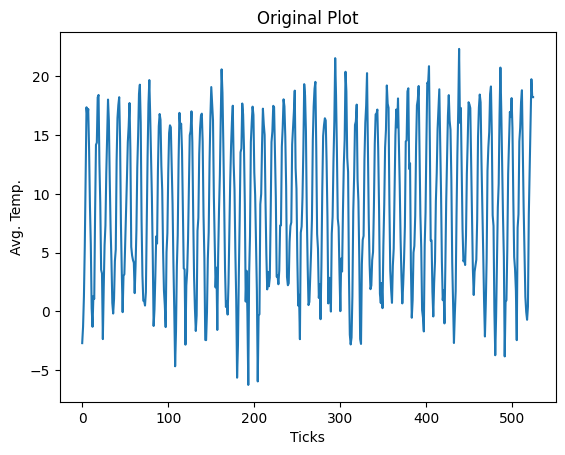

In [45]:
#very simple plotting
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Avg. Temp.')
ax1.set_title('Original Plot')
ax1.plot('Ticks', 'AverageTemperature', data = df_Germany);

In [ ]:
df_Germany

In [ ]:
!pip install --upgrade pandas

ARIMA

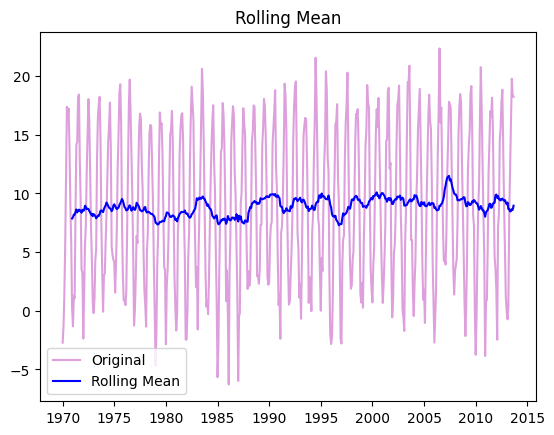

Augmented Dickey-Fuller test:
type of df_test:  <class 'tuple'>
df_test:  (-4.271198430066125, 0.000498087807537409, 16, 508, {'1%': -3.44328828958775, '5%': -2.8672462791357867, '10%': -2.569809231353463}, 2060.5638228165117)
df_output: 
 Test Statistic                  -4.271198
p-value                          0.000498
#Lags Used                      16.000000
Number of Observations Used    508.000000
dtype: float64
Test Statistic                  -4.271198
p-value                          0.000498
#Lags Used                      16.000000
Number of Observations Used    508.000000
Critical Value (1%)             -3.443288
Critical Value (5%)             -2.867246
Critical Value (10%)            -2.569809
dtype: float64


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

def stationarity_check(ts):
    # Determing rolling statistics
    roll_mean = ts.rolling(window=12).mean()

    # Plot rolling statistics:
    plt.plot(ts, color='plum',label='Original')
    plt.plot(roll_mean, color='blue', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)

    # Perform Augmented Dickey-Fuller test:
    print('Augmented Dickey-Fuller test:')
    df_test = adfuller(ts)
    print("type of df_test: ",type(df_test))
    print("df_test: ",df_test)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print("df_output: \n",df_output)
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    print(df_output)

# Example usage
stationarity_check(df_Germany.AverageTemperature)


In [60]:
df_Germany['Roll_Mean'] = df_Germany['AverageTemperature'].rolling(window=12).mean()


In [62]:
df_Germany.head(40)

,AverageTemperature,Ticks,Roll_Mean
dt,,,
1970-01-01,-2.721,0,NaN
1970-02-01,-1.331,1,NaN
1970-03-01,1.234,2,NaN
1970-04-01,5.512,3,NaN
1970-05-01,11.665,4,NaN
1970-06-01,17.371,5,NaN
1970-07-01,16.565,6,NaN
1970-08-01,17.229,7,NaN
1970-09-01,13.804,8,NaN


In [63]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

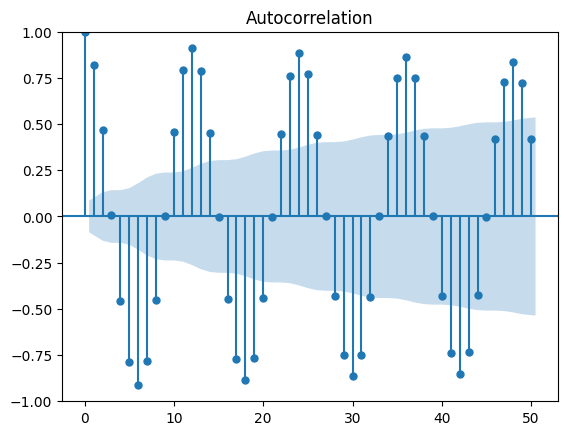

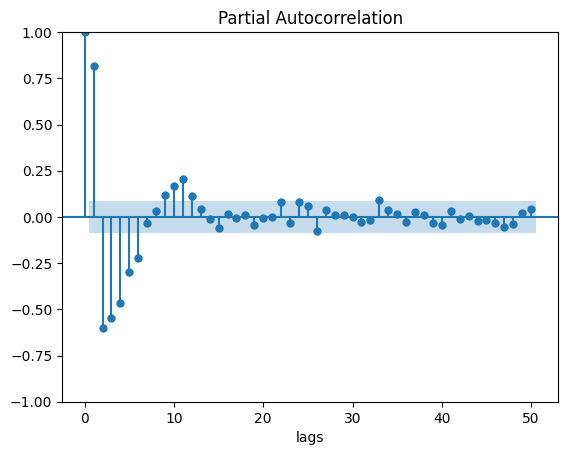

In [64]:
plot_acf(df_Germany.AverageTemperature, lags=50)
plot_pacf(df_Germany.AverageTemperature, lags=50)
plt.xlabel('lags')
plt.show()

In [69]:
from statsmodels.tsa.arima_model import ARIMA

In [75]:
import itertools
p = q = range(0, 4)
pq = itertools.product(p, q)
for param in pq:
    try:
        mod = ARIMA(df_Germany.AverageTemperature,order=param)
        results = mod.fit()
        print('ARIMA{} - AIC:{}'.format(param, results.aic))
    except:
        continue

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


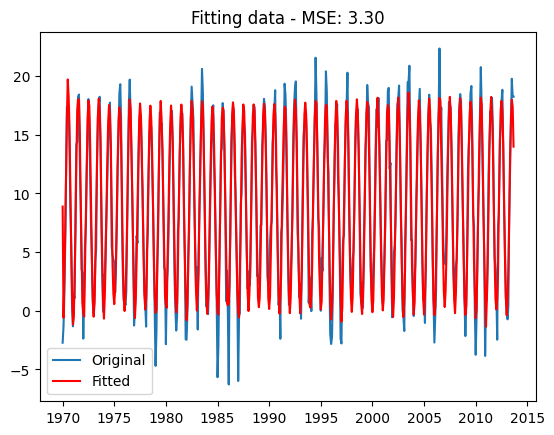

In [73]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Define and fit the ARIMA model
model = ARIMA(df_Germany['AverageTemperature'], order=(2, 0, 3))  # (p, d, q) order
results = model.fit()

# Plot the original data and the fitted values
plt.plot(df_Germany['AverageTemperature'], label='Original')
plt.plot(results.fittedvalues, color='red', label='Fitted')
plt.title('Fitting data - MSE: %.2f' % (((results.fittedvalues - df_Germany['AverageTemperature']) ** 2).mean()))
plt.legend()
plt.show()


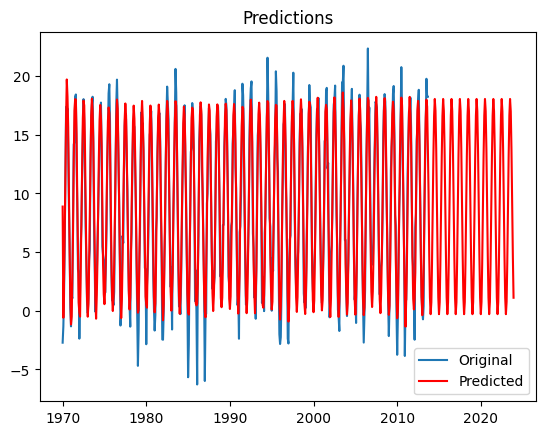

In [78]:

import pandas as pd

start_date = '1970-01-01'
end_date = '2023-12-01'
date_range = pd.date_range(start=start_date, end=end_date, freq='MS')  # Monthly frequency

# Generate predictions
predictions = results.predict(start=start_date, end=end_date)

# Plot the original data and the predicted values
plt.plot(df_Germany['AverageTemperature'], label='Original')
plt.plot(predictions, color='red', label='Predicted')
plt.title('Predictions')
plt.legend()
plt.show()


In [79]:
predictions

1970-01-01     8.875766
1970-02-01    -0.595431
1970-03-01     2.526862
1970-04-01     6.561666
1970-05-01    11.508557
                ...    
2023-08-01    16.987649
2023-09-01    13.758139
2023-10-01     9.220053
2023-11-01     4.589720
2023-12-01     1.108188
Freq: MS, Name: predicted_mean, Length: 648, dtype: float64

In [84]:
df_Germany['AverageTemperature']

dt
1970-01-01    -2.721
1970-02-01    -1.331
1970-03-01     1.234
1970-04-01     5.512
1970-05-01    11.665
               ...  
2013-05-01    12.151
2013-06-01    15.927
2013-07-01    19.762
2013-08-01    18.233
2013-09-01    18.233
Name: AverageTemperature, Length: 525, dtype: float64

##Evaluation -
-Root Mean Squared Error


-Mean Absolute Error

In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
start_date='1970-01-01'
end_date='2013-09-01'
# Trim the original data to match the length of predictions
actual_values = df_Germany['AverageTemperature'].loc[start_date:end_date]

# Trim predictions to match the length of actual values
predictions_trimmed = predictions.loc[start_date:end_date]

# Compute RMSE and MAE
rmse = np.sqrt(mean_squared_error(actual_values, predictions_trimmed))
mae = mean_absolute_error(actual_values, predictions_trimmed)

print("RMSE:", rmse)
print("MAE:", mae)


RMSE: 1.816406228725294
MAE: 1.3884107538613968
